In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Loading the Data & Forming the Dataframe

In [2]:
local_path_target = '/mnt/g/Meine Ablage/raw_data/Target/Hourly/energy_generation_data/df_deutschland.csv'
local_path_feature = "/mnt/g/Meine Ablage/raw_data/Features/DATAFRAMES/wind_hourly_clean.csv"

data_target = pd.read_csv(local_path_target)
data_feature = pd.read_csv(local_path_feature, index_col=0)

data_target['Date'] = pd.to_datetime(data_target.Date)

In [3]:
data_target.head()

,Date,Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh],region
0,2015-01-01 00:00:00,48.0,3641.0,0.0,50hertz
1,2015-01-01 01:00:00,48.0,4016.0,0.0,50hertz
2,2015-01-01 02:00:00,48.0,4232.0,0.0,50hertz
3,2015-01-01 03:00:00,48.0,3994.0,0.0,50hertz
4,2015-01-01 04:00:00,48.0,3809.0,0.0,50hertz


In [4]:
type(data_target["Date"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
generation_df = data_target.groupby(by=data_target['Date']).sum()
generation_df.head()

,Wind offshore[MWh],Wind onshore[MWh],Photovoltaics[MWh]
Date,,,
2015-01-01 00:00:00,517.0,8129.0,0.0
2015-01-01 01:00:00,516.0,8300.0,0.0
2015-01-01 02:00:00,514.0,8544.0,0.0
2015-01-01 03:00:00,519.0,8552.0,0.0
2015-01-01 04:00:00,522.0,8646.0,0.0


In [6]:
wind_df = generation_df[['Wind offshore[MWh]','Wind onshore[MWh]']].sum(axis=1)
wind_df.head(24)

Date
2015-01-01 00:00:00     8646.0
2015-01-01 01:00:00     8816.0
2015-01-01 02:00:00     9058.0
2015-01-01 03:00:00     9071.0
2015-01-01 04:00:00     9168.0
2015-01-01 05:00:00     9239.0
2015-01-01 06:00:00     9692.0
2015-01-01 07:00:00    10334.0
2015-01-01 08:00:00    10210.0
2015-01-01 09:00:00    10032.0
2015-01-01 10:00:00    10553.0
2015-01-01 11:00:00    11389.0
2015-01-01 12:00:00    12104.0
2015-01-01 13:00:00    12506.0
2015-01-01 14:00:00    11923.0
2015-01-01 15:00:00    11853.0
2015-01-01 16:00:00    13584.0
2015-01-01 17:00:00    15439.0
2015-01-01 18:00:00    16869.0
2015-01-01 19:00:00    18010.0
2015-01-01 20:00:00    19187.0
2015-01-01 21:00:00    20356.0
2015-01-01 22:00:00    21239.0
2015-01-01 23:00:00    22086.0
dtype: float64

In [7]:
wind_df.isna().sum()

0

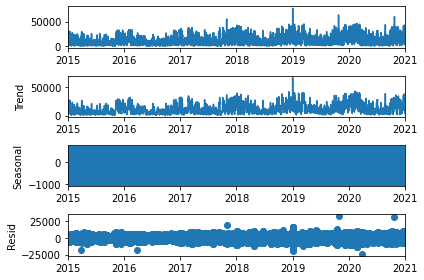

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_add = seasonal_decompose(wind_df, model = "additive")
decomp_add.plot();

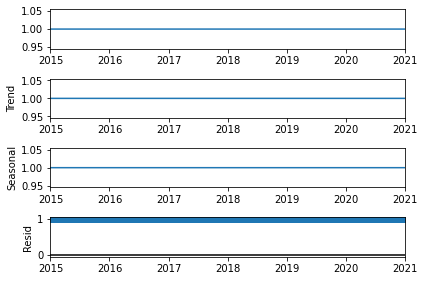

In [9]:

decomp_mul = seasonal_decompose(wind_df >= 0 , model = "multiplicative")
decomp_mul.plot();

In [10]:
type(data_target.index[1])

int

In [12]:
data_feature.index[1]

'2015-01-01 01:00:00'

In [13]:
data_feature.index = pd.to_datetime(data_feature.index)
data_feature.head()

,90,125,161,164,183,197,198,232,282,298,...,15000,15044,15120,15122,15189,15200,15207,15214,15444,1001
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2.1,0.7,0.9,5.1,11.3,3.2,1.6,1.1,0.7,7.0,...,3.9,0.8,4.9,3.2,4.4,3.0,0.5,1.2,1.0,2.2
2015-01-01 01:00:00,2.7,0.3,0.8,4.9,13.0,3.2,2.6,1.5,0.9,7.4,...,3.4,0.7,5.3,2.6,6.0,2.8,0.8,1.1,1.0,2.5
2015-01-01 02:00:00,2.5,0.8,1.3,3.9,12.8,3.2,3.2,1.7,0.9,7.1,...,3.8,1.3,4.8,2.3,5.7,3.1,0.5,1.8,1.2,2.6
2015-01-01 03:00:00,2.0,0.7,1.4,3.7,12.4,3.2,3.5,1.5,0.6,6.9,...,4.2,1.1,4.2,2.5,5.4,3.2,0.7,1.1,1.0,2.8
2015-01-01 04:00:00,1.1,0.9,1.7,4.2,12.2,3.2,3.4,1.7,1.0,6.0,...,4.4,0.9,4.1,1.8,6.1,3.6,0.8,0.9,1.4,2.8


In [14]:
data_feat_mean = data_feature.mean(axis=1)
data_feat_mean_log = np.log(data_feature.mean(axis=1))

In [15]:
exog_1 = data_feat_mean.loc[:'2016-01-01 00:00:00']

In [16]:
exog_test = data_feat_mean.loc['2016-01-01 00:00:00':'2016-03-01 00:00:00']

In [63]:
exog_test_2w = data_feat_mean.loc['2016-01-01 00:00:00':'2016-01-15 00:00:00']

## Statistical Exploration

### Building Test, Train set

In [18]:
wind_df_train = wind_df.loc[:dt.date(2016,1,1)]
wind_df_test = wind_df.loc[dt.date(2016,1,1):dt.date(2016,3,1)]

wind_df_train_log = np.log(wind_df.loc[:dt.date(2016,1,1)])
wind_df_test_log = np.log(wind_df.loc[dt.date(2016,1,1):dt.date(2016,3,1)])

In [61]:
wind_df_test_2w = wind_df.loc[dt.date(2016,1,1):dt.date(2016,1,15)]

In [62]:
wind_df_test_2w.tail()

Date
2016-01-14 20:00:00    10499.0
2016-01-14 21:00:00    10394.0
2016-01-14 22:00:00     9929.0
2016-01-14 23:00:00     9749.0
2016-01-15 00:00:00     9662.0
dtype: float64

<AxesSubplot:>

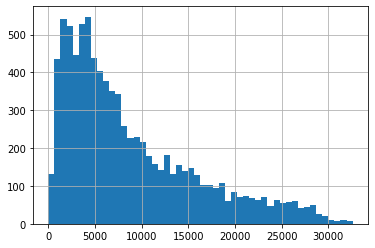

In [22]:
wind_df_train.hist(bins=50)

Text(0, 0.5, 'Energy generation by in MW/H')

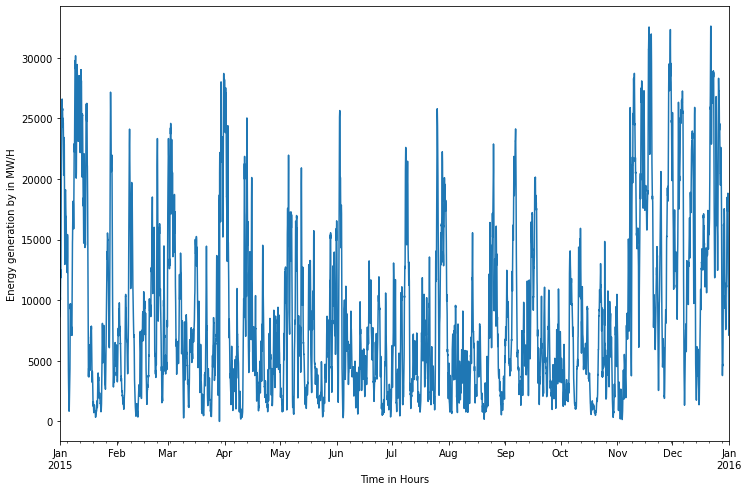

In [23]:
plt.subplots(figsize=(12,8))
wind_df_train.plot()
plt.xlabel("Time in Hours")
plt.ylabel("Energy generation by in MW/H")

In [24]:
adfuller(wind_df_train)[1]

9.013654849711734e-12

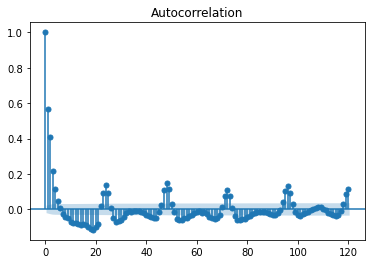

In [25]:
plot_acf(wind_df_train.diff(1).dropna(), lags=120);

In [26]:
def plot_autocorrelation(y, d=0, D=0, m=0):
    y = pd.Series(y)
    if D > 0:
        for i in range(D):
            y = y.diff(m)
    if d > 0:
        for i in range(d):
            y = y.diff(1)
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,2,3)
    ax3 = fig.add_subplot(2,2,4)
    ax1.plot(y)
    plot_acf(y, lags = 60, ax=ax2);
    plot_pacf(y, lags=50, ax=ax3, color='r');
    plt.show()

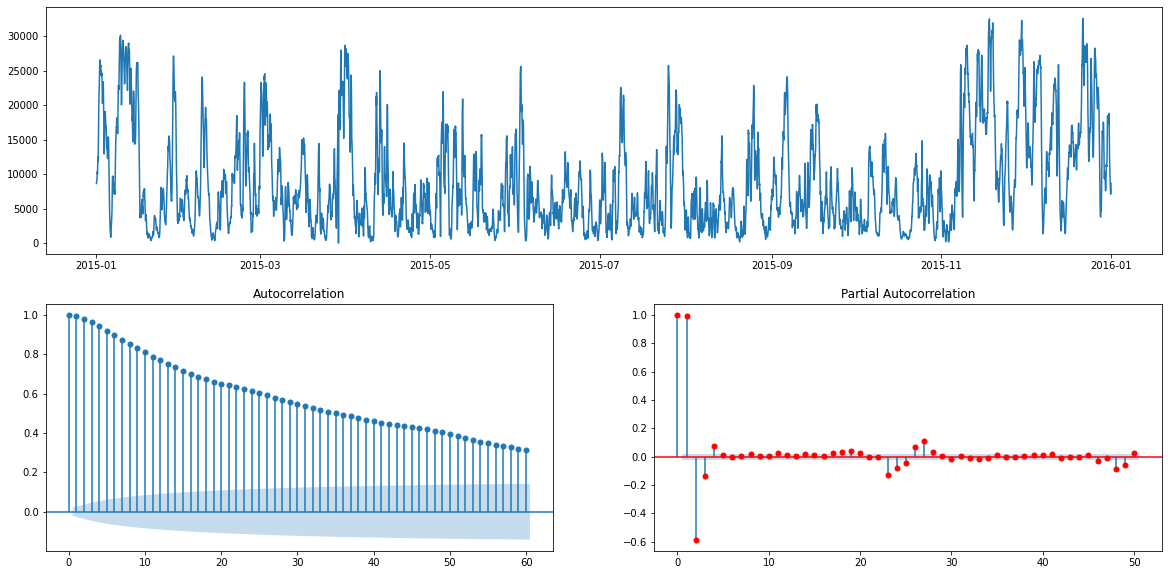

In [27]:
plot_autocorrelation(wind_df_train, D=0, m=365*5)

Format to code if we need to tun it again /n
import pmdarima as pm

smodel = pm.auto_arima(wind_df_train, m=12, X=exog_1.to_numpy().reshape(-1,1),
                       #start_p=0, max_p=2,
                       #start_q=0, max_q=5,
                       max_P=2, max_D=1,max_Q=2,
                       seasonal=True,
                       trace=True)

In [91]:
# Order Parameters of best model with exog wind speed and hourly data, non logarithmic data, 1 year timeframe 2015 - 2016
bm_order = (0,1,2)
# 24 as last parameter because ACF plot shows a recurring theme once a day
bm_seasonal_order = (2,0,0,24)

## Model

In [69]:
sarimax = SARIMAX(endog=wind_df_train, exog=exog_1, order=bm_order, seasonal_order=bm_seasonal_order ).fit()

/home/hauke/.pyenv/versions/3.8.6/envs/predict_energy_generation/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/hauke/.pyenv/versions/3.8.6/envs/predict_energy_generation/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [70]:
wind_df_test.shape

(1441,)

In [71]:
y_pred = sarimax.forecast(wind_df_test.shape[0], exog=exog_test)[0]

In [72]:
def plot_forecast(fc, train, test, upper=None, lower=None):
    is_confidence_int = isinstance(upper, np.ndarray) and isinstance(lower, np.ndarray)
    # Prepare plot series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(upper, index=test.index) if is_confidence_int else None
    upper_series = pd.Series(lower, index=test.index) if is_confidence_int else None

    # Plot
    plt.figure(figsize=(10,4), dpi=100)
    plt.plot(train, label='training', color='black')
    plt.plot(test, label='actual', color='black', ls='--')
    plt.plot(fc_series, label='forecast', color='orange')
    if is_confidence_int:
        plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8);

In [73]:
forecast = sarimax.forecast(len(wind_df_test), exog=exog_test, alpha=0.05)

In [74]:
forecast

2016-01-01 01:00:00     9206.298152
2016-01-01 02:00:00     9633.207455
2016-01-01 03:00:00     9888.581002
2016-01-01 04:00:00     9936.261237
2016-01-01 05:00:00    10001.511403
                           ...     
2016-02-29 21:00:00    12738.818844
2016-02-29 22:00:00    12394.041441
2016-02-29 23:00:00    12027.931657
2016-03-01 00:00:00    11601.284035
2016-03-01 01:00:00    11206.346710
Freq: H, Name: predicted_mean, Length: 1441, dtype: float64

In [75]:
wind_df_test

Date
2016-01-01 00:00:00    8650.0
2016-01-01 01:00:00    8580.0
2016-01-01 02:00:00    8544.0
2016-01-01 03:00:00    8446.0
2016-01-01 04:00:00    8298.0
                        ...  
2016-02-29 20:00:00    9631.0
2016-02-29 21:00:00    9160.0
2016-02-29 22:00:00    8320.0
2016-02-29 23:00:00    7371.0
2016-03-01 00:00:00    5791.0
Length: 1441, dtype: float64

In [76]:
(forecast - wind_df_test).mean()

-300.7858453535366

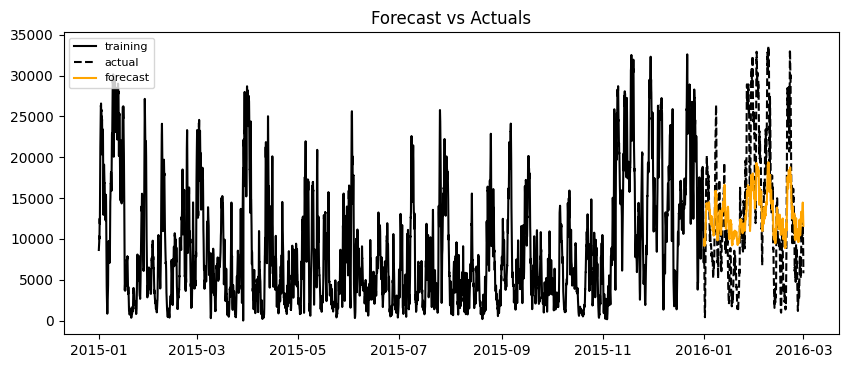

In [77]:
plot_forecast(forecast, wind_df_train, wind_df_test)

In [78]:
def mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(np.abs(y_true-y_pred))/(len(y_true))

def mse(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_true-y_pred)**2)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [79]:
hourly_baseline = mean_absolute_percentage_error(wind_df_test, forecast)
hourly_baseline

82.3800313448197

In [80]:
np.exp(y_test) - np.exp(forecast)

NameError: name 'y_test' is not defined

In [81]:
hourly_baseline_log = mean_absolute_percentage_error(np.log(wind_df_test), np.log(forecast))
hourly_baseline_log

5.703872652416039

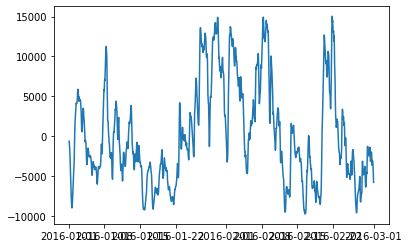

In [82]:
plt.plot(wind_df_test - forecast)

### Predicting accuracy with 2 week test set

In [83]:
forecast_2w = sarimax.forecast(len(wind_df_test_2w), exog=exog_test_2w, alpha=0.05)

In [84]:
hourly_baseline_2w = mean_absolute_percentage_error(wind_df_test_2w, forecast_2w)
hourly_baseline_2w

55.20399082458663

## New Model trained with Air Pressure Data

### Importing the Air pressure data

In [85]:
local_path_feature_2 = "/mnt/g/Meine Ablage/raw_data/Features/DATAFRAMES/hourly_airp_df.csv"
data_feature_2 = pd.read_csv(local_path_feature, index_col=0)

In [86]:
data_feature_2.head()

,90,125,161,164,183,197,198,232,282,298,...,15000,15044,15120,15122,15189,15200,15207,15214,15444,1001
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,2.1,0.7,0.9,5.1,11.3,3.2,1.6,1.1,0.7,7.0,...,3.9,0.8,4.9,3.2,4.4,3.0,0.5,1.2,1.0,2.2
2015-01-01 01:00:00,2.7,0.3,0.8,4.9,13.0,3.2,2.6,1.5,0.9,7.4,...,3.4,0.7,5.3,2.6,6.0,2.8,0.8,1.1,1.0,2.5
2015-01-01 02:00:00,2.5,0.8,1.3,3.9,12.8,3.2,3.2,1.7,0.9,7.1,...,3.8,1.3,4.8,2.3,5.7,3.1,0.5,1.8,1.2,2.6
2015-01-01 03:00:00,2.0,0.7,1.4,3.7,12.4,3.2,3.5,1.5,0.6,6.9,...,4.2,1.1,4.2,2.5,5.4,3.2,0.7,1.1,1.0,2.8
2015-01-01 04:00:00,1.1,0.9,1.7,4.2,12.2,3.2,3.4,1.7,1.0,6.0,...,4.4,0.9,4.1,1.8,6.1,3.6,0.8,0.9,1.4,2.8


In [87]:
data_feat2_mean = data_feature_2.mean(axis=1)

In [88]:
exog_2 = data_feat_mean.loc[:'2016-01-01 00:00:00']

In [92]:
exog_2_test = data_feat_mean.loc['2016-01-01 00:00:00':'2016-03-01 00:00:00']

In [93]:
exog_2_test_2w = data_feat_mean.loc['2016-01-01 00:00:00':'2016-01-15 00:00:00']

### Training_new_Model

In [94]:
sarimax_exog2 = SARIMAX(endog=wind_df_train, exog=exog_2, order=bm_order, seasonal_order=bm_seasonal_order ).fit()

/home/hauke/.pyenv/versions/3.8.6/envs/predict_energy_generation/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
/home/hauke/.pyenv/versions/3.8.6/envs/predict_energy_generation/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [98]:
# Making a forecast#
forecast_exog2 = sarimax_exog2.forecast(wind_df_test.shape[0], exog=exog_2_test)[0]

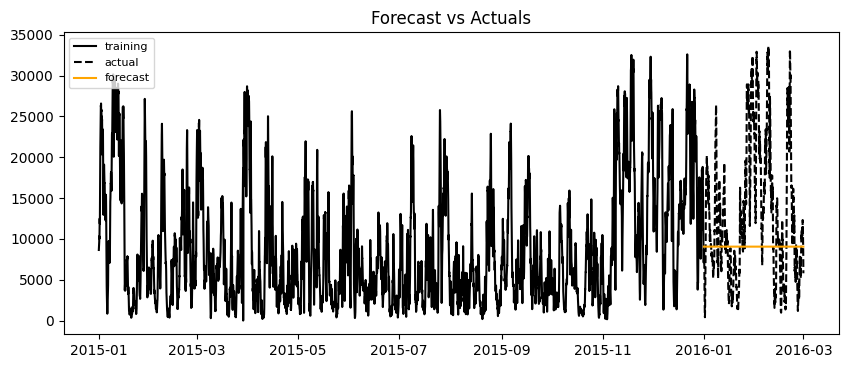

In [99]:
plot_forecast(forecast_exog2, wind_df_train, wind_df_test)